In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
yt_data = pd.read_csv("G:\DSyoutube\data.csv")

In [5]:
print(yt_data.head(5))

  Rank Grade                Channel name Video Uploads Subscribers  \
0  1st  A++                       Zee TV         82757    18752951   
1  2nd  A++                     T-Series         12661    61196302   
2  3rd  A++   Cocomelon - Nursery Rhymes           373    19238251   
3  4th  A++                    SET India         27323    31180559   
4  5th  A++                          WWE         36756    32852346   

   Video views  
0  20869786591  
1  47548839843  
2   9793305082  
3  22675948293  
4  26273668433  


In [6]:
print(yt_data.tail(5))

         Rank Grade       Channel name Video Uploads Subscribers  Video views
4995  4,996th   B+      Uras Benlioğlu           706     2072942    441202795
4996  4,997th   B+   HI-TECH MUSIC LTD           797     1055091    377331722
4997  4,998th   B+         Mastersaint           110     3265735    311758426
4998  4,999th   B+      Bruce McIntosh          3475       32990     14563764
4999  5,000th   B+           SehatAQUA           254       21172     73312511


In [7]:
print(yt_data.dtypes)

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object


In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


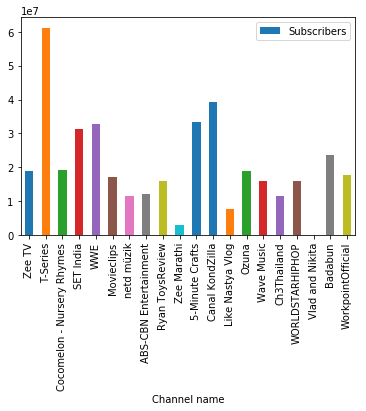

In [9]:
yt_data['Subscribers'] = pd.to_numeric(yt_data['Subscribers'], errors='coerce')
yt_data['Video Uploads'] = pd.to_numeric(yt_data['Video Uploads'], errors='coerce')
yt_data.head(20).plot.bar(x = "Channel name", y = "Subscribers")

Text(0.5,1,'Number of videos uploaded for top 20 channels')

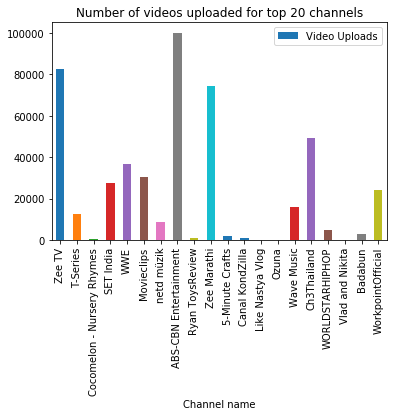

In [10]:
yt_data.head(20).plot.bar(x = "Channel name", y = "Video Uploads")
plt.title("Number of videos uploaded for top 20 channels")

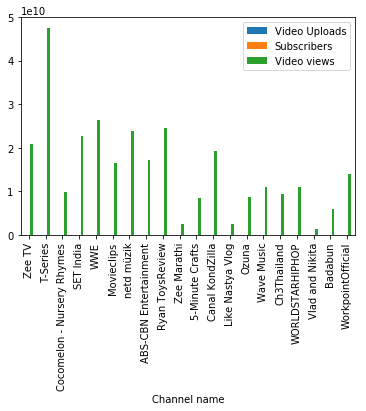

In [11]:
yt_data.head(20).plot.bar(x = "Channel name")


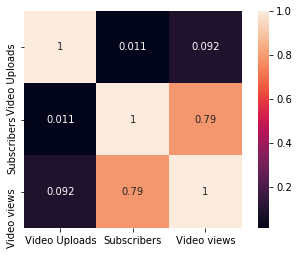

In [12]:
corr = yt_data.corr()
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

C:\Users\Public\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


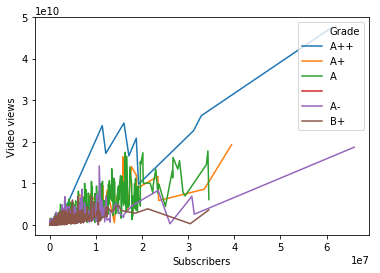

In [13]:
sns.lineplot(x = 'Subscribers', y = 'Video views', hue = 'Grade', data = yt_data)

In [14]:
print(yt_data.columns.values)

['Rank' 'Grade' 'Channel name' 'Video Uploads' 'Subscribers' 'Video views']


In [15]:
print(yt_data.dtypes)

Rank              object
Grade             object
Channel name      object
Video Uploads    float64
Subscribers      float64
Video views        int64
dtype: object


In [16]:
print(yt_data.isna().sum())

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64


In [17]:
yt_data.fillna(yt_data.mean(), inplace=True)

In [18]:
print(yt_data.isna().sum())

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64


In [19]:
yt_data['Subscribers'] = yt_data['Subscribers'].real
yt_data['Video Uploads'] = yt_data['Video Uploads'].real

In [20]:
rankArr = np.arange(1,5001)
yt_data['Rank'] = rankArr

In [21]:
print(yt_data.dtypes)

Rank               int32
Grade             object
Channel name      object
Video Uploads    float64
Subscribers      float64
Video views        int64
dtype: object


In [22]:
mydata = yt_data[['Rank', 'Grade', 'Video Uploads', 'Subscribers', 'Video views']].copy()
gradeDict = {'A++ ':1, 'A+ ':2, 'A ':3, 'A- ':4, 'B+ ':5, '\xa0 ':6}
mydata['Grade'] = mydata['Grade'].map(gradeDict)

In [23]:
X = pd.DataFrame(data = mydata[['Video Uploads', 'Subscribers', 'Video views']])

In [24]:
X['Video views'] = mydata['Video views']/100000

In [25]:
X['Subscribers'] = X['Subscribers']/1000


In [26]:
X['Video views'] = round(X['Video views'], 0)
X['Subscribers'] = round(X['Subscribers'], 0)

In [27]:
Y = pd.DataFrame(data = mydata[['Grade']])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [29]:
X_train.fillna(yt_data.mean(), inplace=True)
y_train.fillna(yt_data.mean(), inplace=True)

C:\Users\Public\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [30]:
print(X_train.head(5))

      Video Uploads  Subscribers  Video views
4112       208265.0        383.0       6599.0
3579          456.0       1351.0       3355.0
2396          550.0        414.0       1161.0
2055            8.0         61.0        196.0
3576         3490.0       1749.0      12151.0


In [31]:
np.isfinite(X_train.all())

Video Uploads    True
Subscribers      True
Video views      True
dtype: bool

In [32]:
np.where(y_train.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [33]:
np.where(X_train.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(solver = 'newton-cg', multi_class='multinomial', max_iter = 1000)
logreg.fit(X_train, y_train)
testModel = logreg.score(X_test, y_test)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Public\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Public\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [35]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.63


In [36]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train) 

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
ypred = clf.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))


Accuracy of SVM classifier on test set: 0.58


In [38]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  1,   0,   0,   0,   0,   0],
       [  0,   0,   8,   0,   1,   0],
       [  0,   0,  75,   0, 134,   0],
       [  0,   0,  26,   1, 176,   0],
       [  0,   0,  20,   0, 556,   0],
       [  0,   0,   0,   0,   2,   0]], dtype=int64)

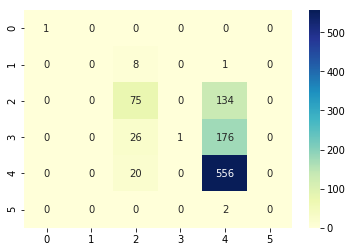

In [39]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

In [40]:
cnf_matrix_svm = metrics.confusion_matrix(y_test, ypred)
cnf_matrix_svm

array([[  0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   9,   0],
       [  0,   0,   0,   0, 209,   0],
       [  0,   0,   0,   0, 203,   0],
       [  0,   0,   0,   0, 576,   0],
       [  0,   0,   0,   0,   2,   0]], dtype=int64)

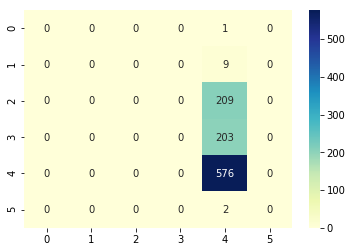

In [41]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

In [42]:
X_Train = X_train
Y_Train = y_train
X_Test = X_test
Y_Test = y_test

In [43]:
mm_scaler = MinMaxScaler(feature_range = (0,1))

mm_scaler.fit(X_Train)
X_Train = mm_scaler.transform(X_Train)
X_Test = mm_scaler.transform(X_Test)

In [44]:
svm_clf = SVC(gamma='auto')
svm_clf.fit(X_Train, Y_Train) 

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
Y_Pred = svm_clf.predict(X_Test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(svm_clf.score(X_Test, Y_Test)))

Accuracy of logistic regression classifier on test set: 0.60


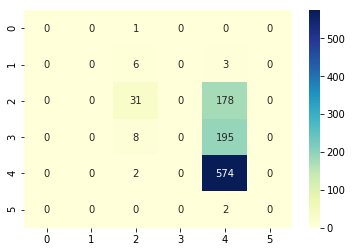

In [46]:
cnf_matrix1 = metrics.confusion_matrix(Y_Test, Y_Pred)
cnf_matrix1
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

In [47]:
logReg = LogisticRegression(solver = 'newton-cg', multi_class='multinomial', max_iter = 1500)
logReg.fit(X_Train, Y_Train)
test_Model = logReg.score(X_Test, Y_Test)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
Y_Predict = logReg.predict(X_Test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(X_Test, Y_Test)))

Accuracy of logistic regression classifier on test set: 0.62


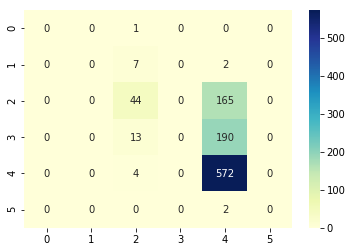

In [50]:
cnf_matrix_lr = metrics.confusion_matrix(Y_Test, Y_Predict)
cnf_matrix_lr
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")